In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
num_locations = 15
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = [25,25]
num_vehicles = 3
print(locations)

[(18, 90), (68, 87), (58, 84), (82, 27), (71, 90), (49, 52), (72, 69), (39, 80), (94, 38), (30, 73), (67, 25), (5, 20), (48, 20), (2, 30), (69, 65)]


In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[j]) - np.array(vehicle_route[j + 1]))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std (distances)
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)

In [7]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [8]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	485.232	1.31937
1  	230   	460.883	0.350763
2  	241   	449.952	1.15823 
3  	234   	440.704	1.15823 
4  	229   	432.675	1.15823 
5  	239   	432.344	3.03634 
6  	222   	421.272	1.34319 
7  	238   	420.446	2.5996  
8  	227   	421.479	0.986747
9  	217   	418.393	1.23268 
10 	221   	411.172	1.48564 
11 	235   	411.817	4.94723 
12 	221   	403.522	0.224685
13 	226   	401.917	0.224685
14 	225   	400.198	0.224685
15 	212   	396.248	0.224685
16 	225   	398.419	0.224685
17 	219   	385.285	0.224685
18 	244   	378.184	2.14323 
19 	226   	365.124	2.28142 
20 	223   	356.449	4.59938 
21 	241   	345.846	2.45995 
22 	214   	330.202	4.20726 
23 	226   	328.825	3.4043  
24 	224   	327.38 	4.43997 
25 	220   	325.739	4.79682 
26 	231   	320.409	4.79682 
27 	226   	313.78 	4.79682 
28 	241   	313.661	5.03793 
29 	232   	312.873	7.0384  
30 	235   	308    	2.86569 


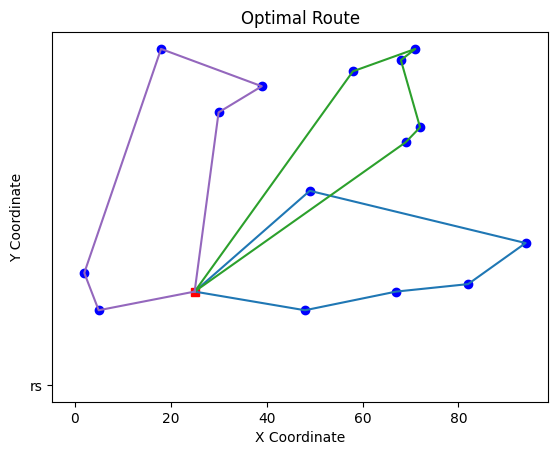

Best Individual: [5, 2, 9, 8, 4, 7, 3, 1, 0, 10, 6, 13, 12, 14, 11]
Fitness: (502.98693345014766, 7.506396589514308)


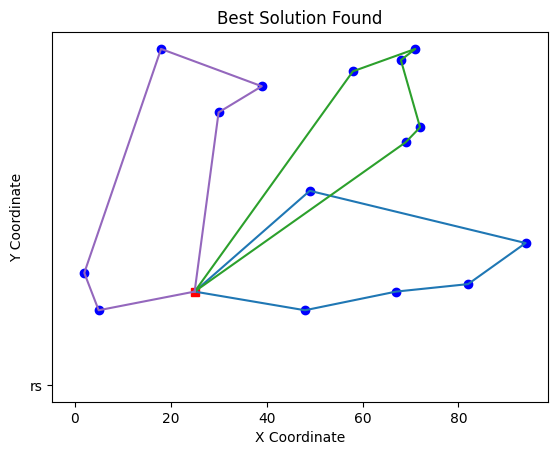

In [9]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


if __name__ == "__main__":
    pop, stats, hof = main()
    best_individual = hof[0]
    print("Best Individual:", best_individual)
    print("Fitness:", best_individual.fitness.values)
    plot_routes(best_individual, "Best Solution Found")